In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import numpy as np



In [2]:
df = pd.read_csv('final_data.csv')
df

,State,Commodity,Year,Month,Min_Price,Max_Price,Predominant Soil Types,Min_Temp,Max_Temp,Humidity,Rainfall
0,Andaman and Nicobar,Amaranthus,2019,3,1500.0,8000.0,"Alluvial soils, Red loam, Clayey soils, Lateri...",27.11,29.83,68.287097,0.357419
1,Andaman and Nicobar,Amaranthus,2019,4,1500.0,6000.0,"Alluvial soils, Red loam, Clayey soils, Lateri...",28.93,31.23,69.320000,1.610667
2,Andaman and Nicobar,Amaranthus,2019,5,2000.0,4000.0,"Alluvial soils, Red loam, Clayey soils, Lateri...",28.58,30.11,79.564839,5.621290
3,Andaman and Nicobar,Amaranthus,2019,6,2000.0,3000.0,"Alluvial soils, Red loam, Clayey soils, Lateri...",27.73,29.77,82.505333,15.528000
4,Andaman and Nicobar,Amaranthus,2019,7,4000.0,8000.0,"Alluvial soils, Red loam, Clayey soils, Lateri...",28.43,29.12,81.863226,6.879677
...,...,...,...,...,...,...,...,...,...,...,...
85802,West Bengal,Wheat,2024,9,2600.0,2900.0,"Alluvial soils, Laterite soils",26.88,29.72,90.295000,13.193667
85803,West Bengal,Wheat,2024,10,2600.0,2900.0,"Alluvial soils, Laterite soils",25.31,29.24,88.473226,6.654194
85804,West Bengal,Wheat,2024,11,2700.0,3300.0,"Alluvial soils, Laterite soils",19.35,26.64,79.159000,0.065667
85805,West Bengal,Wheat,2024,12,2900.0,6000.0,"Alluvial soils, Laterite soils",13.49,20.36,78.991613,0.147097


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85807 entries, 0 to 85806
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   85807 non-null  object 
 1   Commodity               85807 non-null  object 
 2   Year                    85807 non-null  int64  
 3   Month                   85807 non-null  int64  
 4   Min_Price               85807 non-null  float64
 5   Max_Price               85807 non-null  float64
 6   Predominant Soil Types  85807 non-null  object 
 7   Min_Temp                85807 non-null  float64
 8   Max_Temp                85807 non-null  float64
 9   Humidity                85807 non-null  float64
 10  Rainfall                85807 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.2+ MB


In [4]:
# Check the data type of the 'Year' column
print(df['Year'].dtype)

# Check unique values in the 'Year' column
print(df['Year'].unique())


int64
[2019 2022 2023 2024 2020 2021 2025]


In [5]:
years_to_drop = [2001, 2002, 2004, 2005, 2009, 2010, 2011, 2013, 2014]
df = df[~df['Year'].isin(years_to_drop)]

print(df)

                     State   Commodity  Year  Month  Min_Price  Max_Price  \
0      Andaman and Nicobar  Amaranthus  2019      3     1500.0     8000.0   
1      Andaman and Nicobar  Amaranthus  2019      4     1500.0     6000.0   
2      Andaman and Nicobar  Amaranthus  2019      5     2000.0     4000.0   
3      Andaman and Nicobar  Amaranthus  2019      6     2000.0     3000.0   
4      Andaman and Nicobar  Amaranthus  2019      7     4000.0     8000.0   
...                    ...         ...   ...    ...        ...        ...   
85802          West Bengal       Wheat  2024      9     2600.0     2900.0   
85803          West Bengal       Wheat  2024     10     2600.0     2900.0   
85804          West Bengal       Wheat  2024     11     2700.0     3300.0   
85805          West Bengal       Wheat  2024     12     2900.0     6000.0   
85806          West Bengal       Wheat  2025      1     2500.0     3200.0   

                                  Predominant Soil Types  Min_Temp  Max_Tem

In [6]:
df['Mid_Price']=(df['Max_Price']+df['Min_Price'])/2

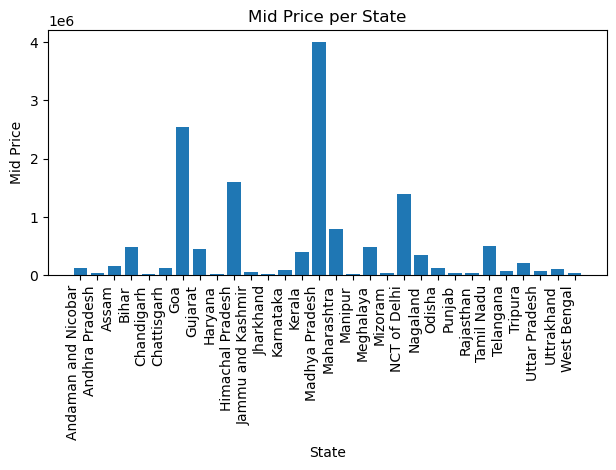

In [7]:
plt.bar(df.State, df.Max_Price) # Plotting for all states
plt.xlabel("State")
plt.ylabel("Mid Price")
plt.title("Mid Price per State")
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout
plt.show()

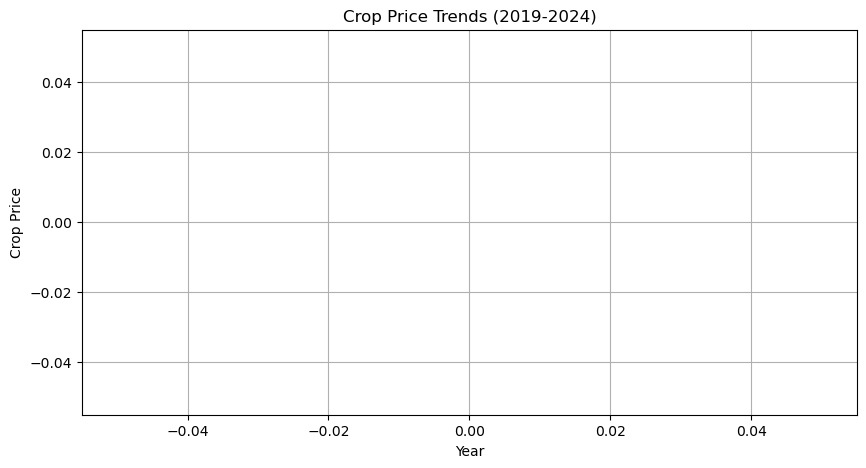

In [8]:
# Plot prices over time for specific commodity

# Filter data by specific commodity
commodity = 'Wheat'
filtered_data = df[df['Commodity'] == commodity ]
filtered_data = filtered_data[filtered_data['State'] == 0 ]


plt.figure(figsize=(10, 5))
plt.plot(filtered_data['Year'], filtered_data['Mid_Price'], marker='o')
plt.xlabel("Year")
plt.ylabel("Crop Price")
plt.title("Crop Price Trends (2019-2024)")
plt.grid()
plt.show()

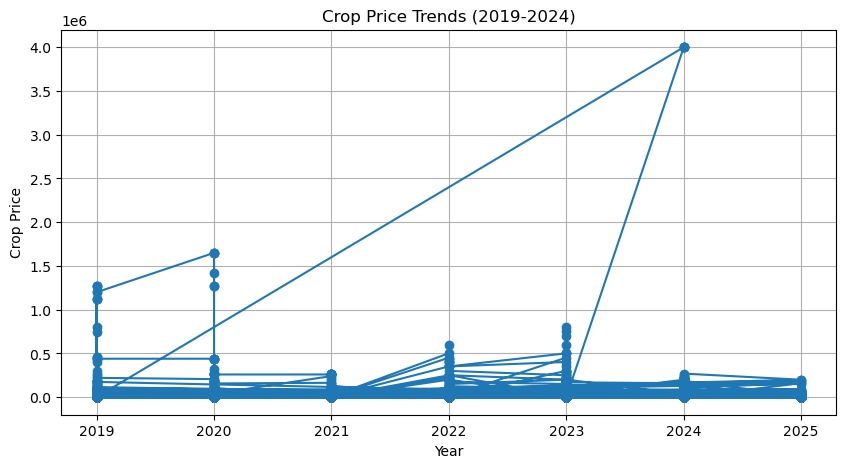

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Filter the DataFrame to include only the years from 2019 to 2024
#df_filtered = df[df['Year'].between(2019, 2024)]
df_filtered = df
# Plot prices over time
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Year'], df_filtered['Mid_Price'], marker='o')
plt.xlabel("Year")
plt.ylabel("Crop Price")
plt.title("Crop Price Trends (2019-2024)")
plt.grid()
plt.show()


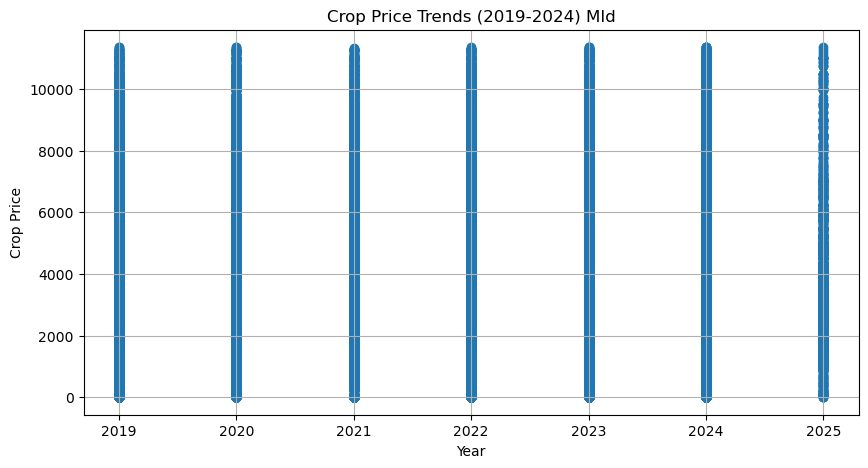

In [10]:
# Remove outliers using the IQR method in mid
Q1 = df_filtered['Mid_Price'].quantile(0.25)
Q3 = df_filtered['Mid_Price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df_filtered[~((df_filtered['Mid_Price'] < (Q1 - 1.5 * IQR)) | (df_filtered['Mid_Price'] > (Q3 + 1.5 * IQR)))]


# Plot prices over time
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Year'], df_filtered['Mid_Price'], marker='o')

plt.xlabel("Year")
plt.ylabel("Crop Price")
plt.title("Crop Price Trends (2019-2024) MId")
plt.grid()
plt.show()


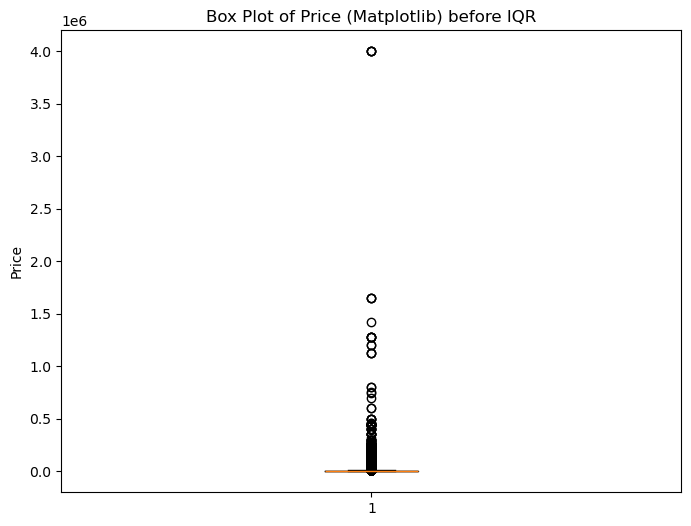

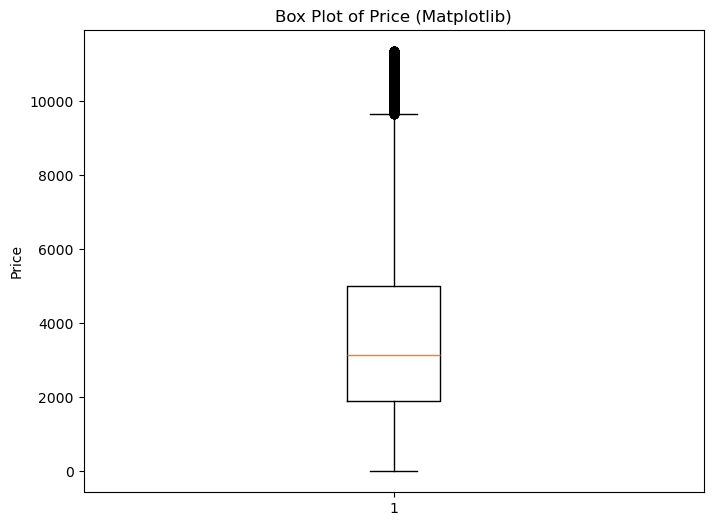

In [11]:
# Basic Box Plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df['Mid_Price'])
plt.title('Box Plot of Price (Matplotlib) before IQR')
plt.ylabel('Price')
plt.show()

# Basic Box Plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['Mid_Price'])
plt.title('Box Plot of Price (Matplotlib)')
plt.ylabel('Price')
plt.show()

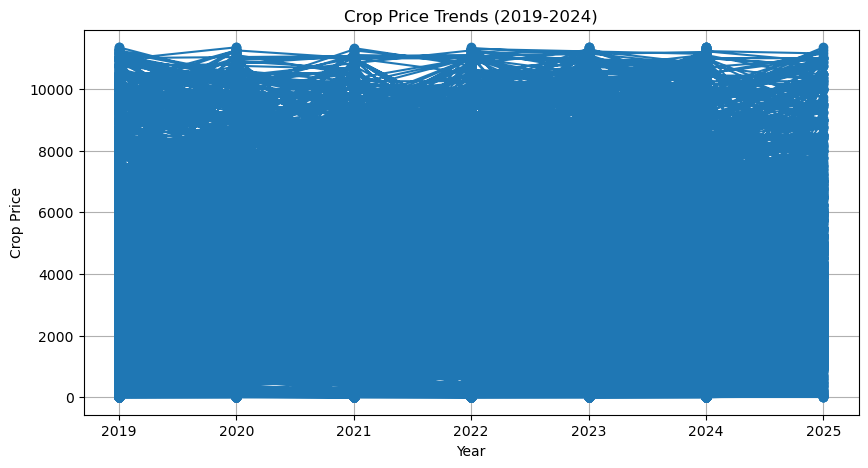

In [12]:

# Plot prices over time
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Year'], df_filtered['Mid_Price'], marker='o')
plt.xlabel("Year")
plt.ylabel("Crop Price")
plt.title("Crop Price Trends (2019-2024)")
plt.grid()
plt.show()

State                       int32
Commodity                   int32
Year                        int64
Month                       int64
Predominant Soil Types      int32
Min_Temp                  float64
Max_Temp                  float64
Humidity                  float64
Rainfall                  float64
dtype: object


C:\Users\lenovo\AppData\Local\Temp\ipykernel_23488\3509528636.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores_df["Score"], y=mi_scores_df["Feature"], palette="viridis")


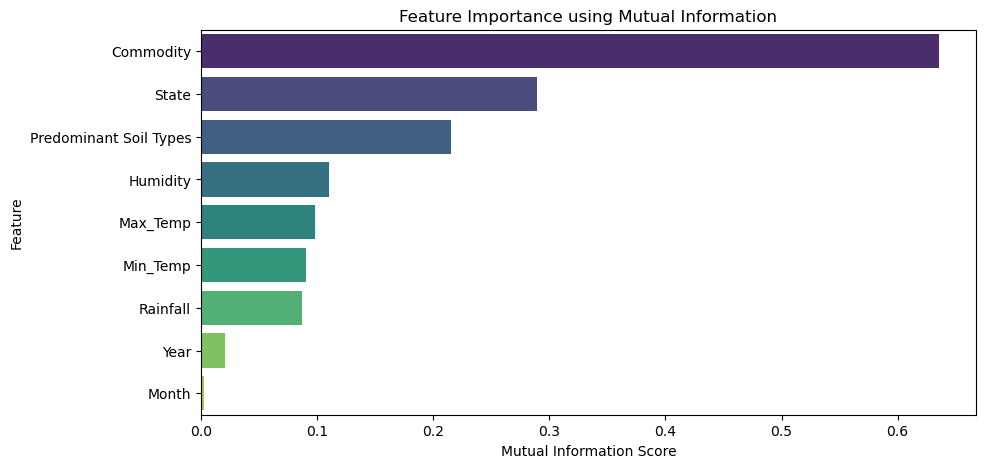

                  Feature     Score
1               Commodity  0.635579
0                   State  0.289022
4  Predominant Soil Types  0.215268
7                Humidity  0.110367
6                Max_Temp  0.098530
5                Min_Temp  0.090660
8                Rainfall  0.086811
2                    Year  0.020623
3                   Month  0.002842


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder


# Drop datetime columns (if present)
if "Date" in df.columns:
    df.drop(columns=["Date"], inplace=True)


# Select feature columns (excluding target variable "Max_Price")
X = df_filtered.drop(columns=["Max_Price","Min_Price","Mid_Price"])  
y = df_filtered["Mid_Price"]  # Target variable

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical columns
for col in ['State', 'Commodity', 'Predominant Soil Types']:
    X[col] = label_encoder.fit_transform(X[col])

# Ensure all columns in X are numerical
print(X.dtypes)

# Compute mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores_df = pd.DataFrame({"Feature": X.columns, "Score": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Score", ascending=False)

# Display feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_scores_df["Score"], y=mi_scores_df["Feature"], palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance using Mutual Information")
plt.show()

# Print top features
print(mi_scores_df)


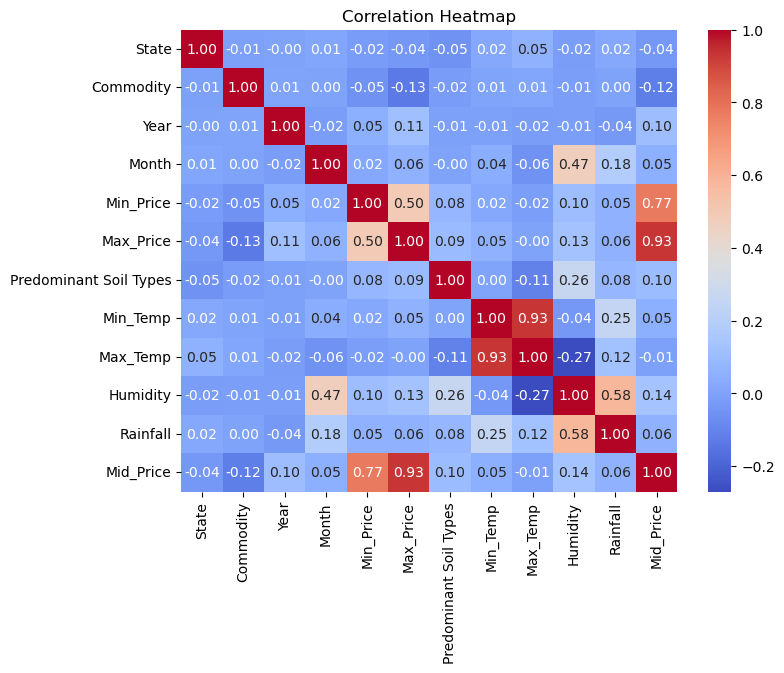

In [14]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns into numeric values
for col in ['State', 'Commodity', 'Predominant Soil Types']:
    df_filtered = df_filtered.copy()
    df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])


correlation_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df_filtered[['State','Commodity','Year','Month','Rainfall', 'Max_Temp','Min_Temp', 'Predominant Soil Types','Humidity']]
y = df_filtered['Mid_Price']


In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 63227, Testing samples: 15807


In [17]:
# Column Transformer for Encoding and Scaling
categorical_cols = ['State', 'Commodity', 'Predominant Soil Types']
numerical_cols = ['Year', 'Month', 'Rainfall', 'Max_Temp', 'Min_Temp', 'Humidity']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# XGBoost Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

In [18]:
# Hyperparameter Grid
xgb_params = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9],
    'xgb__reg_alpha': [0.1],
    'xgb__reg_lambda': [1.0]
}

# Randomized Search
xgb_search = RandomizedSearchCV(pipeline, xgb_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

# Train Model
xgb_search.fit(X_train, y_train)

# Best Model
best_pipeline = xgb_search.best_estimator_
print(f"✅ Best XGBoost Parameters: {xgb_search.best_params_}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best XGBoost Parameters: {'xgb__subsample': 0.9, 'xgb__reg_lambda': 1.0, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 300, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.2, 'xgb__colsample_bytree': 0.8}


In [19]:
# Predictions
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print Results
print(f"📊 Model Performance:")
print(f"🔹 Train R² Score: {train_r2:.4f}")
print(f"🔹 Test R² Score: {test_r2:.4f}")
print(f"🔹 Test MAE: {test_mae:.2f}")
print(f"🔹 Test RMSE: {test_rmse:.2f}")

📊 Model Performance:
🔹 Train R² Score: 0.8343
🔹 Test R² Score: 0.7722
🔹 Test MAE: 806.66
🔹 Test RMSE: 1155.43


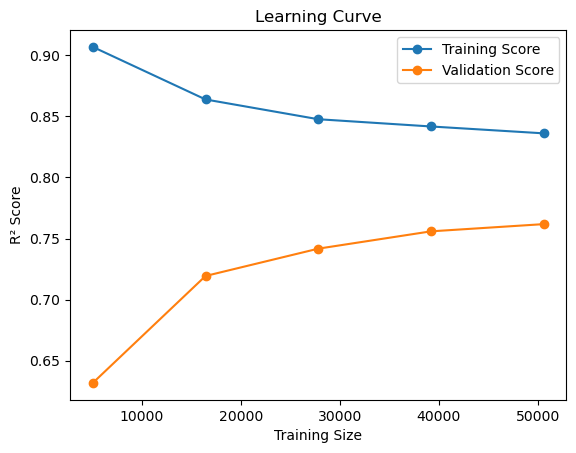

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_pipeline, X_train, y_train, cv=5, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [21]:
import joblib
from joblib import dump,load

dump(best_pipeline, 'crop_price_model.joblib')

['crop_price_model.joblib']

In [22]:
def get_user_input():
    """Gets user input for model prediction."""
    try:
        state = input("Enter State: ")
        commodity = input("Enter Commodity: ")
        year = int(input("Enter Year: "))
        month = int(input("Enter Month: "))
        rainfall = float(input("Enter Rainfall: "))
        max_temp = float(input("Enter Max Temp: "))
        min_temp = float(input("Enter Min Temp: "))
        soil = input("Enter Soil Type: ")
        humidity = float(input("Enter Humidity: "))

        return {
            'State': state,
            'Commodity': commodity,
            'Year': year,
            'Month': month,
            'Rainfall': rainfall,
            'Max_Temp': max_temp,
            'Min_Temp': min_temp,
            'Predominant Soil Types': soil,
            'Humidity': humidity
        }
    except ValueError:
        print("Invalid input. Please enter valid values.")
        return None

def predict_price(input_data):
    """Predicts crop price using the model."""
    try:
        input_df = pd.DataFrame([input_data])
        prediction = best_pipeline.predict(input_df)[0]
        print(f"Predicted Mid Price: {prediction:.2f}")
    except Exception as e:
        print(f"Error during prediction: {e}")

# Main interaction loop
while True:
    print("\nEnter input data for prediction (or 'q' to quit):")
    user_input = get_user_input()

    if user_input:
        predict_price(user_input)

    if input("Continue? (y/n): ").lower() != 'y':
        break

print("Exiting...")


Enter input data for prediction (or 'q' to quit):


Enter State:  q
Enter Commodity:  q
Enter Year:  q


Invalid input. Please enter valid values.


Continue? (y/n):  q


Exiting...
